In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np

import torch_nf
from torch_nf.conditional_nf import NormFlow, ConditionedNormFlow
from torch_nf.error_formatters import dbg_check
from torch_nf.systems import MF_V1
from torch_nf.util import plot_dist
from torch_nf.lfi import train_SNPE

import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
system = MF_V1()

z0 = np.array([[1.3, -1.3, 1.3, -1.0, 0.2, 0.2, 0.2, 0.2]])

x0 = system.simulate(z0)
print(z0, x0)

[[ 1.3 -1.3  1.3 -1.   0.2  0.2  0.2  0.2]] [[0.69489994 0.92288649 1.07991848 0.80281852 1.13049231 1.40219812
  0.2737869  0.32562157 0.42706351 0.2737869  0.32562157 0.42706351]]


In [6]:
from torch_nf.bijectors import ToInterval
# Opt params
D = system.D
M = 1000
num_iters = 1000
R = 6

# two-network arch
arch_type = 'coupling'
hidden_layers = [128]

rs = 1
np.random.seed(rs)
torch.manual_seed(rs)

lb = system.lb
ub = system.ub
support_layer = ToInterval(D, lb, ub)

nf = NormFlow(D, arch_type, True, num_stages=1, 
              num_layers=2, num_units=30, support_layer=support_layer)
cnf = ConditionedNormFlow(nf, x0.shape[1], hidden_layers, dropout=False)
print(cnf.param_net)

Sequential(
  (linear1): Linear(in_features=12, out_features=128, bias=True)
  (tanh1): Tanh()
  (linear2): Linear(in_features=128, out_features=4816, bias=True)
)


### Run SNPE

w tensor(0.0010) tensor(0.0010)
r 1, it 1, loss=6.06E+02
r 1, it 50, loss=2.35E-02
r 1, it 100, loss=1.65E-02
r 1, it 150, loss=1.45E-02
r 1, it 200, loss=1.38E-02
r 1, it 250, loss=1.28E-02
r 1, it 300, loss=1.26E-02
r 1, it 350, loss=1.24E-02
r 1, it 400, loss=1.30E-02
r 1, it 450, loss=1.17E-02
r 1, it 500, loss=1.27E-02
r 1, it 550, loss=1.16E-02
r 1, it 600, loss=1.13E-02
r 1, it 650, loss=1.12E-02
r 1, it 700, loss=1.14E-02
r 1, it 750, loss=1.16E-02
r 1, it 800, loss=1.49E-02
r 1, it 850, loss=1.29E-02
r 1, it 900, loss=1.09E-02
r 1, it 950, loss=1.13E-02
r 1, it 1000, loss=1.10E-02


<Figure size 432x288 with 0 Axes>

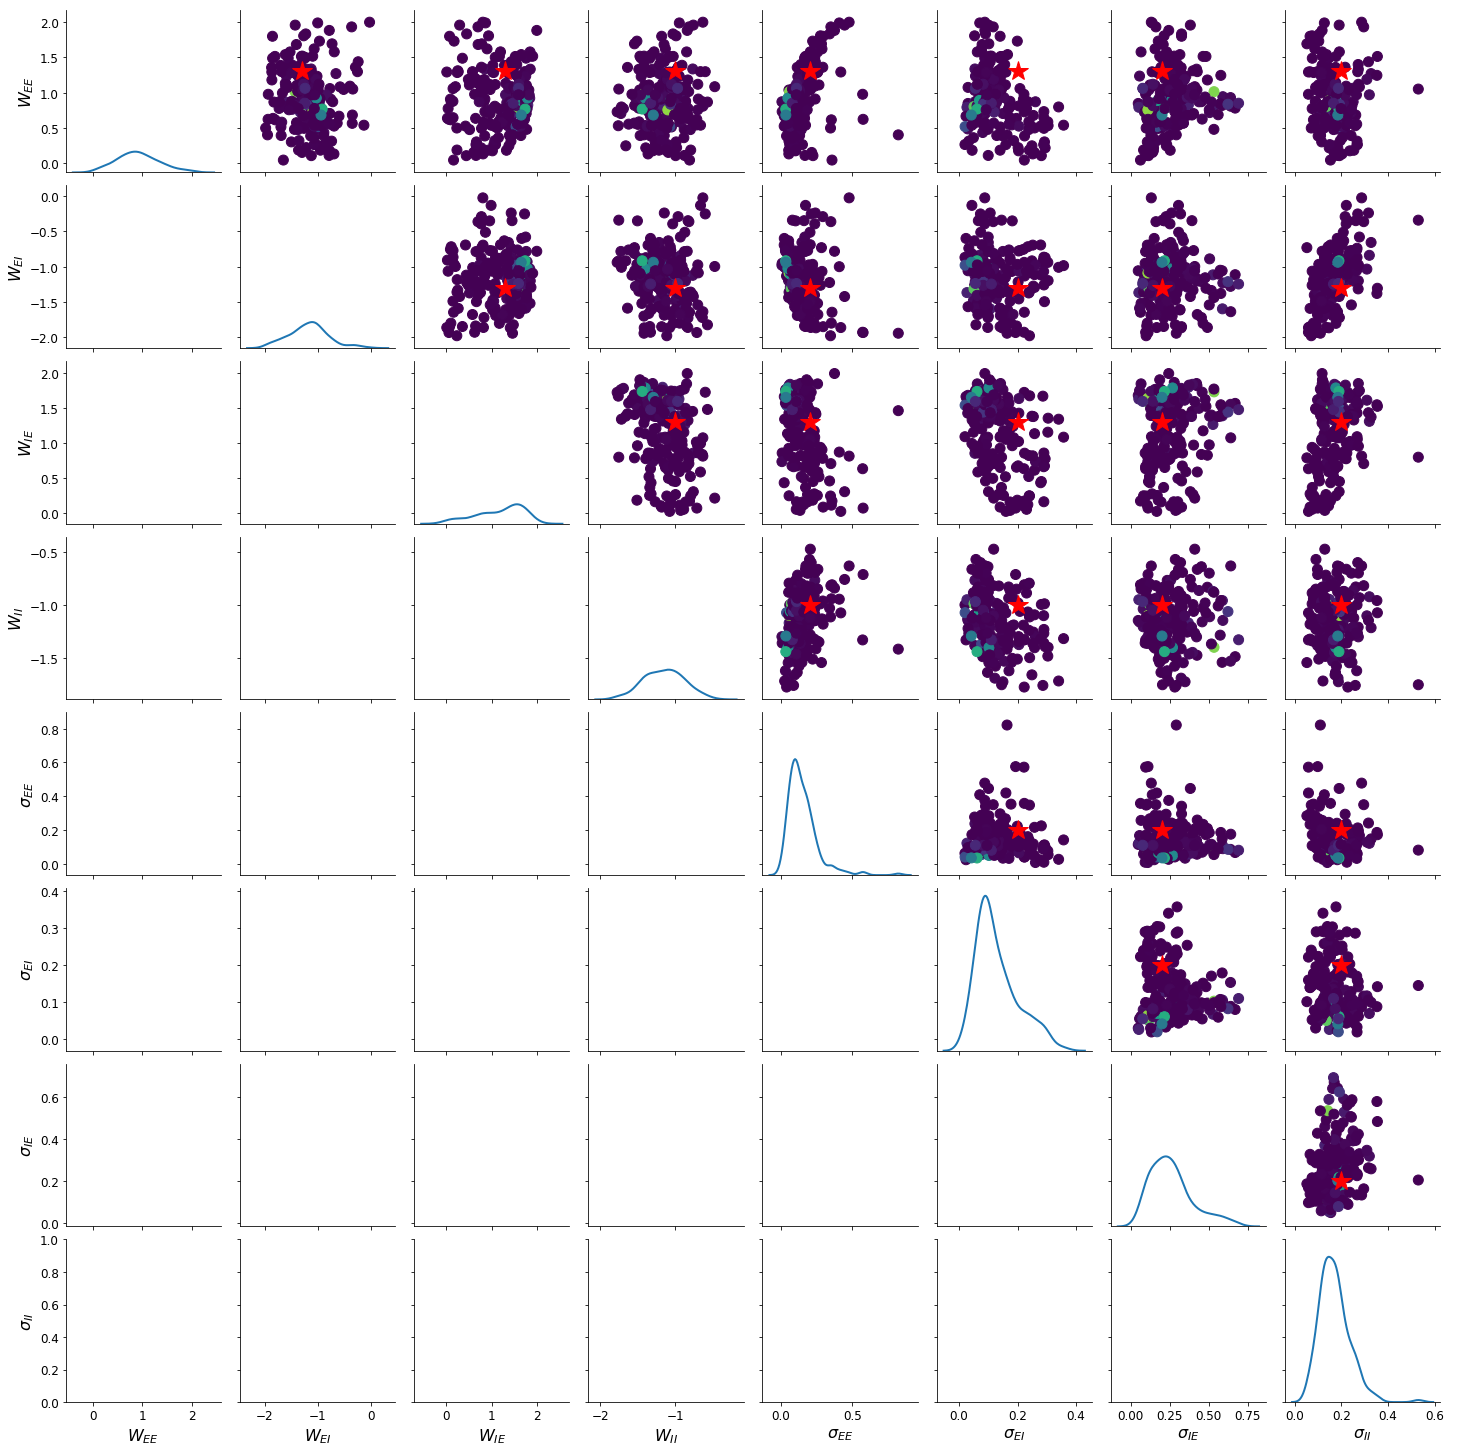

w tensor(6.0240e-09, dtype=torch.float64) tensor(0.5063, dtype=torch.float64)
r 2, it 50, loss=9.18E+00
r 2, it 100, loss=1.04E+00
r 2, it 150, loss=3.90E-02
r 2, it 200, loss=1.33E-01
r 2, it 250, loss=3.33E-02
r 2, it 300, loss=1.31E-01
r 2, it 350, loss=3.59E-02
r 2, it 400, loss=1.39E+01
r 2, it 450, loss=1.33E-01
r 2, it 500, loss=4.28E-02
r 2, it 550, loss=1.43E+00
r 2, it 600, loss=3.75E-02
r 2, it 650, loss=1.65E-01
r 2, it 700, loss=6.13E-02
r 2, it 750, loss=4.57E-02
r 2, it 800, loss=1.18E+00
r 2, it 850, loss=3.75E-02
r 2, it 900, loss=4.11E-02
r 2, it 950, loss=4.69E-02
r 2, it 1000, loss=2.08E+01


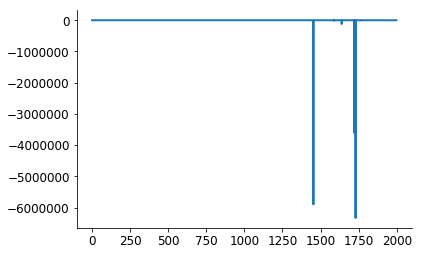

<Figure size 432x288 with 0 Axes>

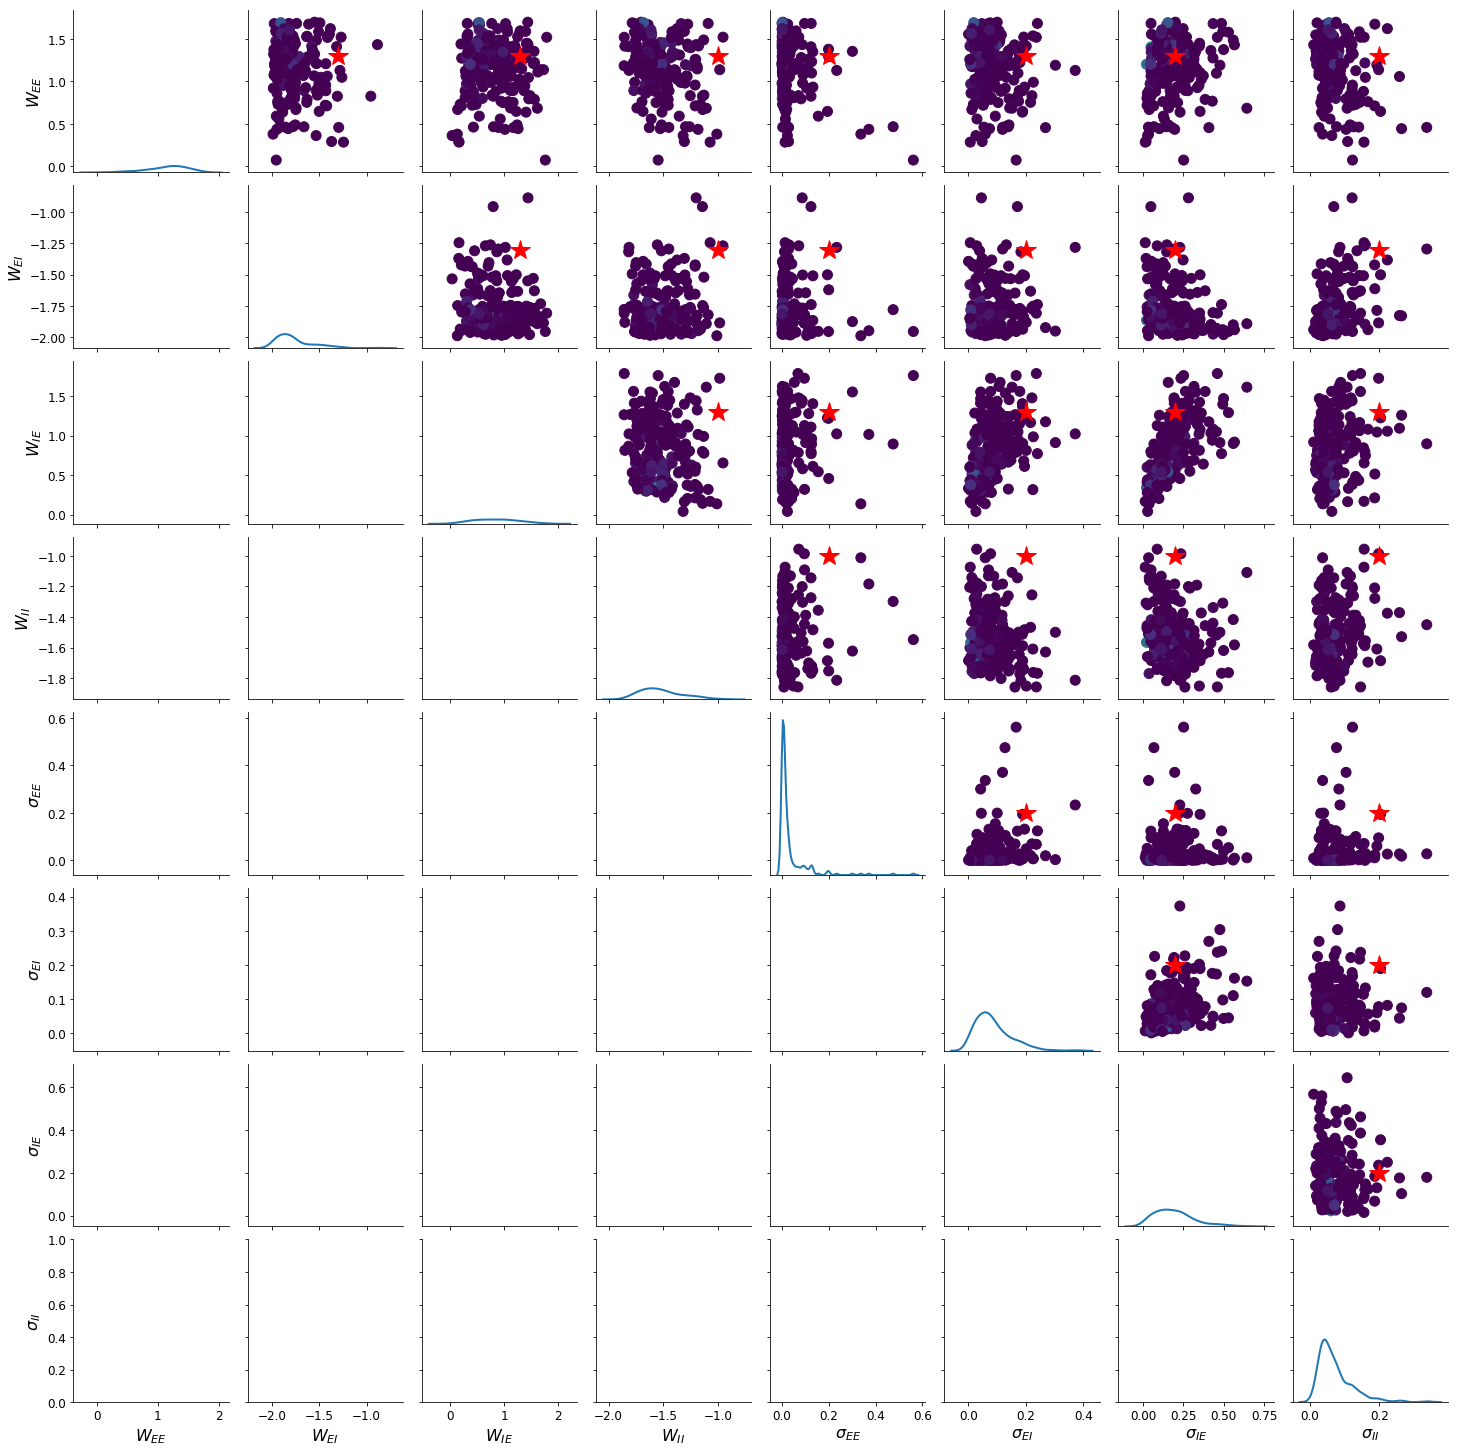

w tensor(5.3718e-10, dtype=torch.float64) tensor(0.2913, dtype=torch.float64)
r 3, it 50, loss=1.61E-02
r 3, it 100, loss=1.74E-02
r 3, it 150, loss=1.18E-02
r 3, it 200, loss=1.48E-02
r 3, it 250, loss=1.07E-02
r 3, it 300, loss=1.02E-02
r 3, it 350, loss=6.13E-03
r 3, it 400, loss=5.77E-03
r 3, it 450, loss=6.34E-03
r 3, it 500, loss=5.31E-03
r 3, it 550, loss=6.94E-03
r 3, it 600, loss=5.27E-03
r 3, it 650, loss=8.11E-03
r 3, it 700, loss=6.75E-03
r 3, it 750, loss=8.75E-03
r 3, it 800, loss=4.16E-03
r 3, it 850, loss=4.33E-02
r 3, it 900, loss=7.16E-03
r 3, it 950, loss=6.87E-03
r 3, it 1000, loss=2.99E-03


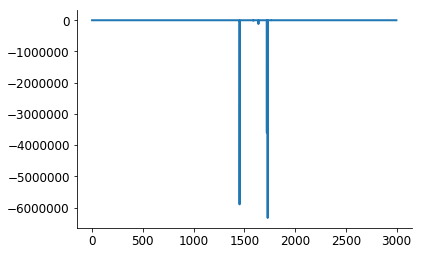

<Figure size 432x288 with 0 Axes>

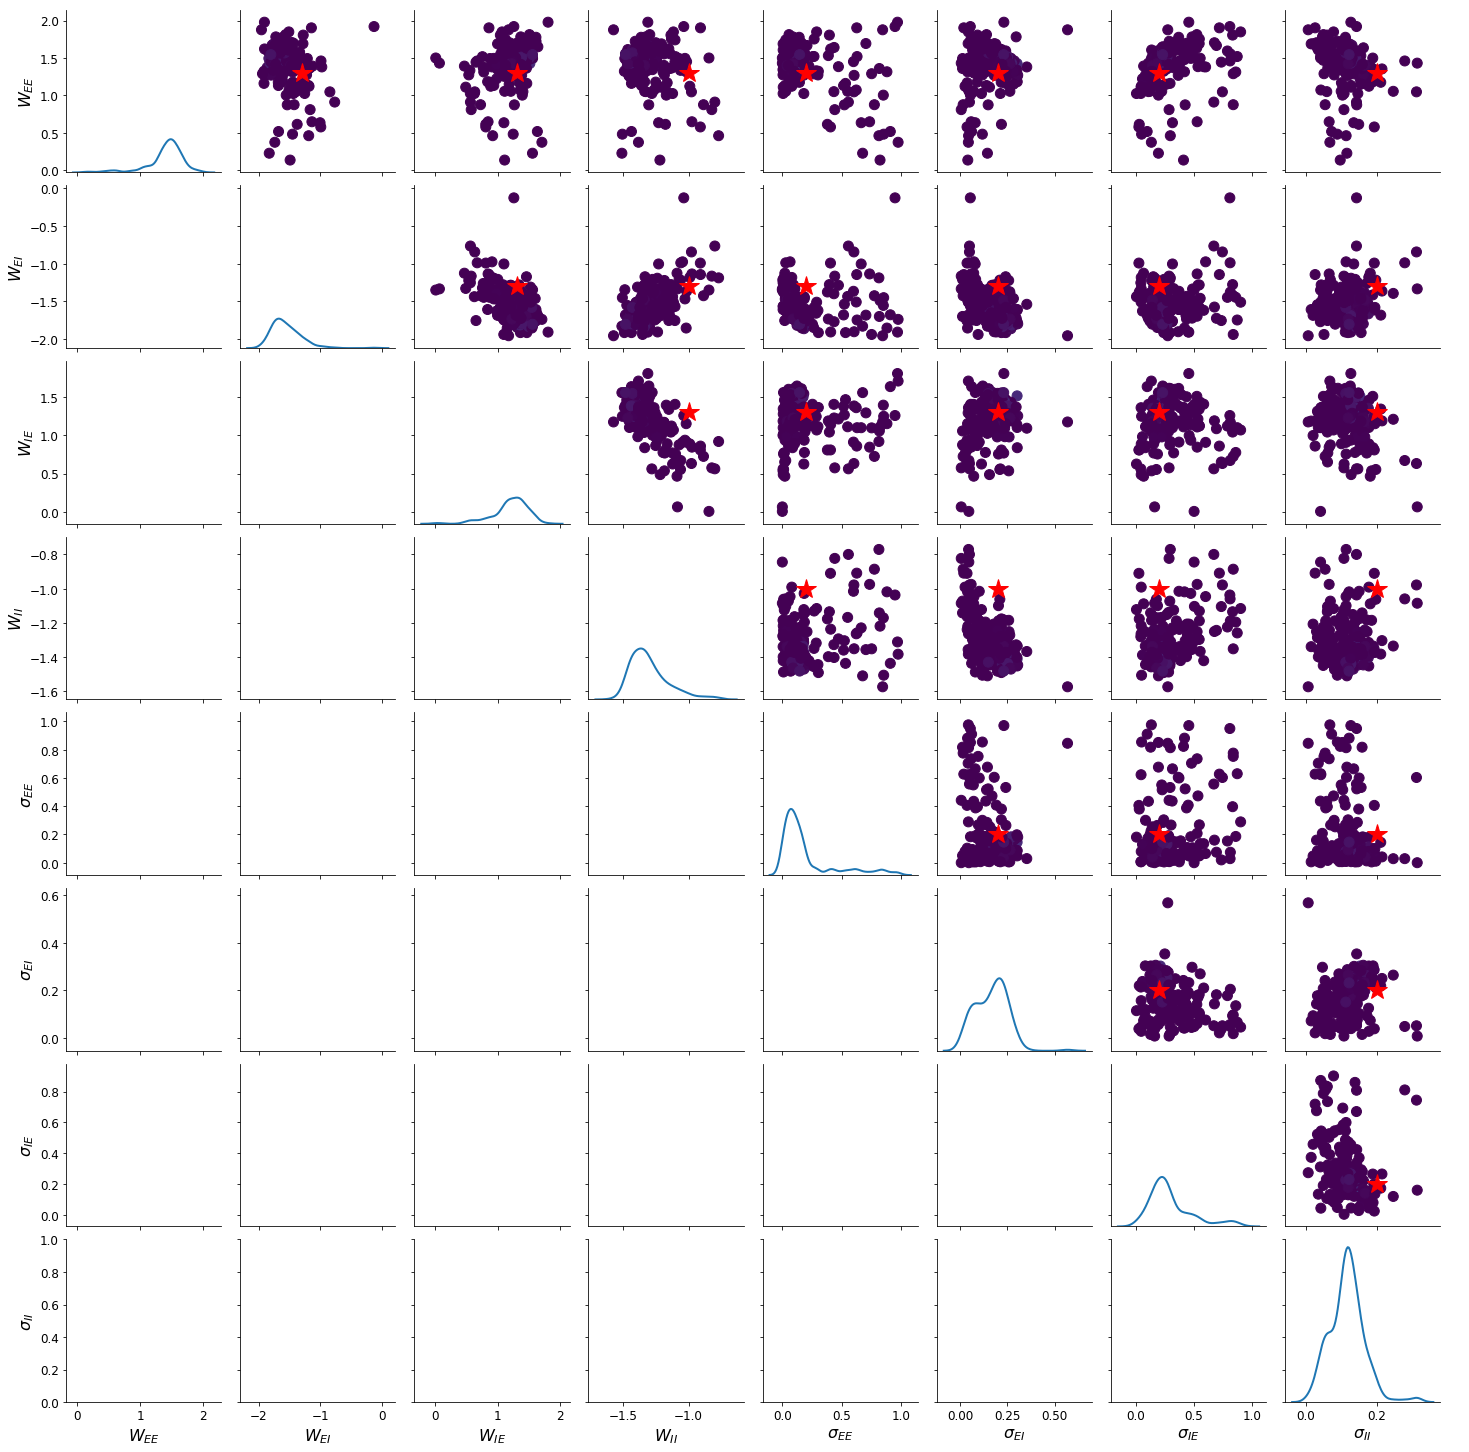

w tensor(2.5847e-11, dtype=torch.float64) tensor(0.3491, dtype=torch.float64)
r 4, it 50, loss=4.52E-02
r 4, it 100, loss=4.95E-02
r 4, it 150, loss=3.32E-02
r 4, it 200, loss=4.30E-02
r 4, it 250, loss=3.78E-02
r 4, it 300, loss=3.47E-02
r 4, it 350, loss=3.91E-02
r 4, it 400, loss=3.74E-02
r 4, it 450, loss=3.24E-02
r 4, it 500, loss=1.59E-01
r 4, it 550, loss=7.37E-02
r 4, it 600, loss=3.69E-02
r 4, it 650, loss=2.11E-01
r 4, it 700, loss=4.72E-02
r 4, it 750, loss=3.15E-02
r 4, it 800, loss=3.83E-02
r 4, it 850, loss=3.61E-02
r 4, it 900, loss=4.92E-02
r 4, it 950, loss=4.34E-02
r 4, it 1000, loss=3.70E-02


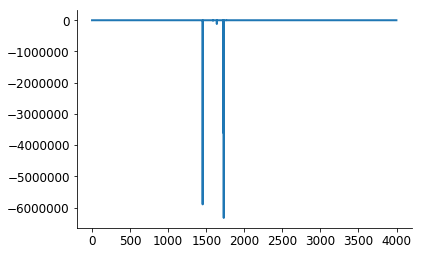

<Figure size 432x288 with 0 Axes>

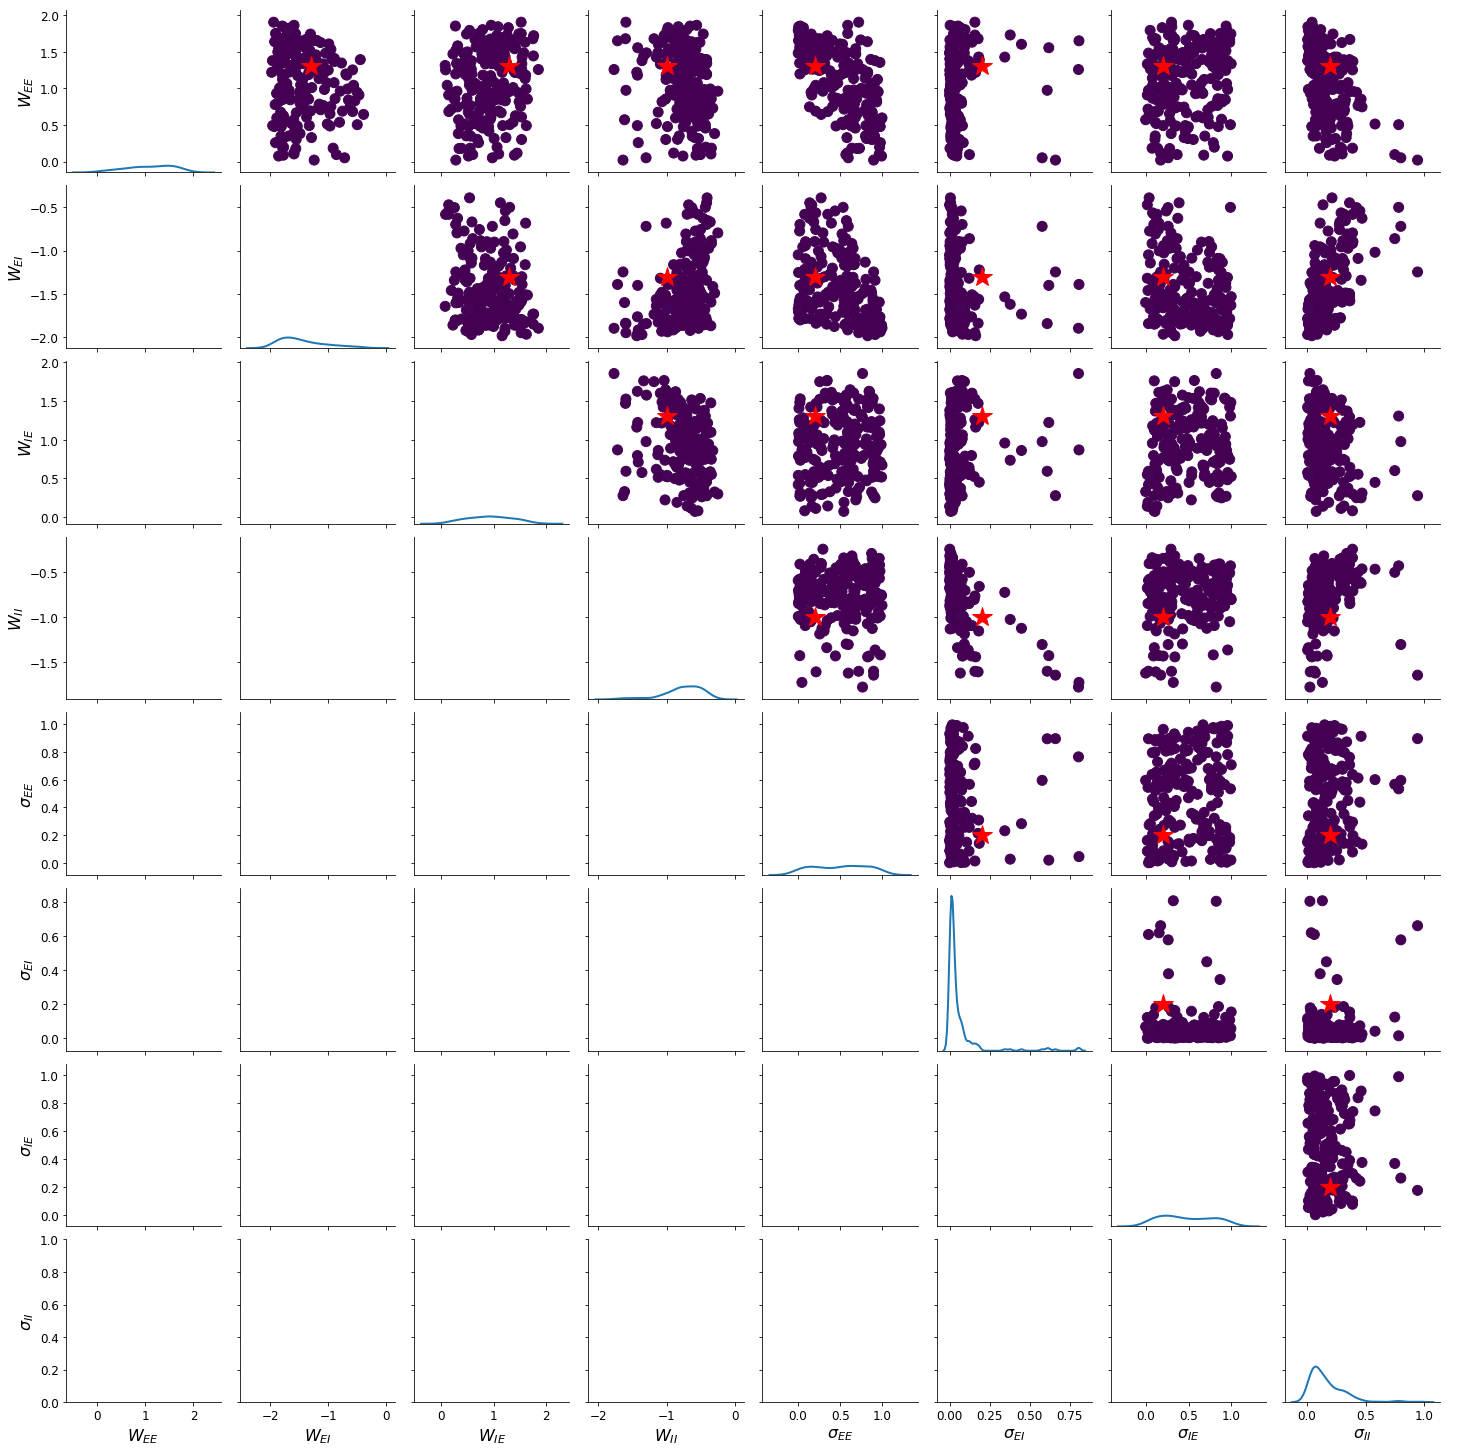

w tensor(5.3903e-09, dtype=torch.float64) tensor(0.4421, dtype=torch.float64)
r 5, it 50, loss=1.85E-01
r 5, it 100, loss=1.07E-01
r 5, it 150, loss=3.99E-02
r 5, it 200, loss=1.14E-01
r 5, it 250, loss=1.02E-01
r 5, it 300, loss=4.14E-02
r 5, it 350, loss=3.76E-02
r 5, it 400, loss=5.22E-02
r 5, it 450, loss=4.51E-02
r 5, it 500, loss=3.98E-02
r 5, it 550, loss=5.25E-02
r 5, it 600, loss=3.73E-02
r 5, it 650, loss=3.29E-02
r 5, it 700, loss=2.29E+00
r 5, it 750, loss=3.70E-02
r 5, it 800, loss=2.10E-01
r 5, it 850, loss=5.18E-02
r 5, it 900, loss=4.29E-02
r 5, it 950, loss=4.41E-02
r 5, it 1000, loss=3.29E-02


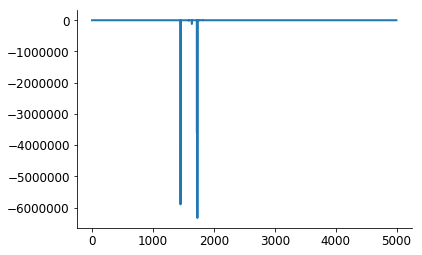

<Figure size 432x288 with 0 Axes>

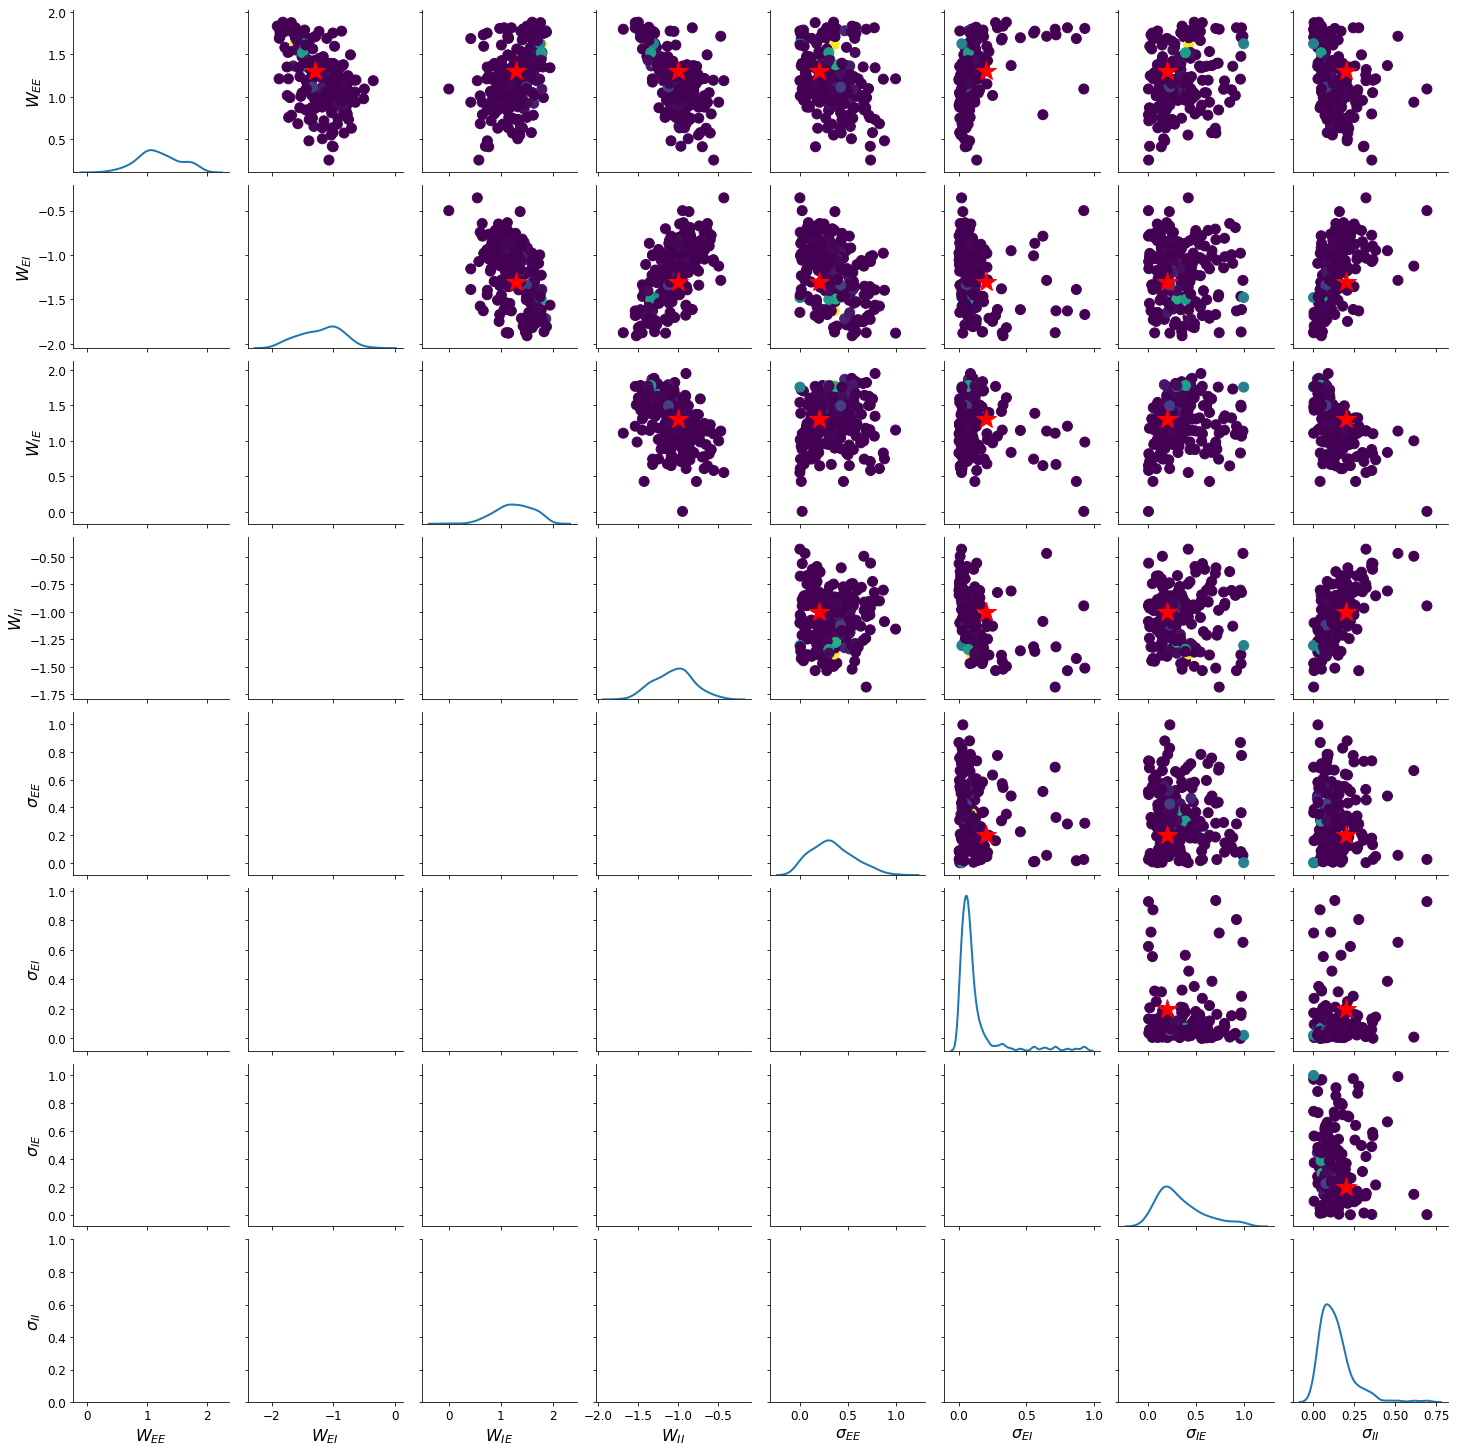

w tensor(1.5934e-09, dtype=torch.float64) tensor(0.6219, dtype=torch.float64)
r 6, it 50, loss=3.51E-01
r 6, it 100, loss=4.38E-02
r 6, it 150, loss=3.64E-02
r 6, it 200, loss=4.83E-01
r 6, it 250, loss=4.18E-02
r 6, it 300, loss=5.56E-02
r 6, it 350, loss=6.17E-02
r 6, it 400, loss=4.19E-02
r 6, it 450, loss=3.76E-02
r 6, it 500, loss=4.87E-02
r 6, it 550, loss=3.71E-02
r 6, it 600, loss=3.69E-02
r 6, it 650, loss=3.44E-02
r 6, it 700, loss=6.11E-02
r 6, it 750, loss=2.69E-02
r 6, it 800, loss=3.78E-02
r 6, it 850, loss=2.88E-02
r 6, it 900, loss=2.26E-01
r 6, it 950, loss=4.04E-02
r 6, it 1000, loss=3.63E-02


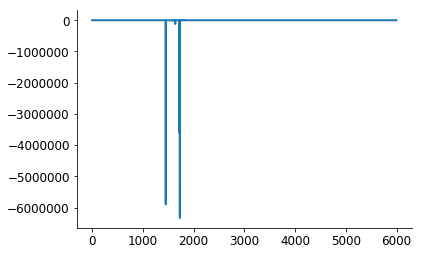

<Figure size 432x288 with 0 Axes>

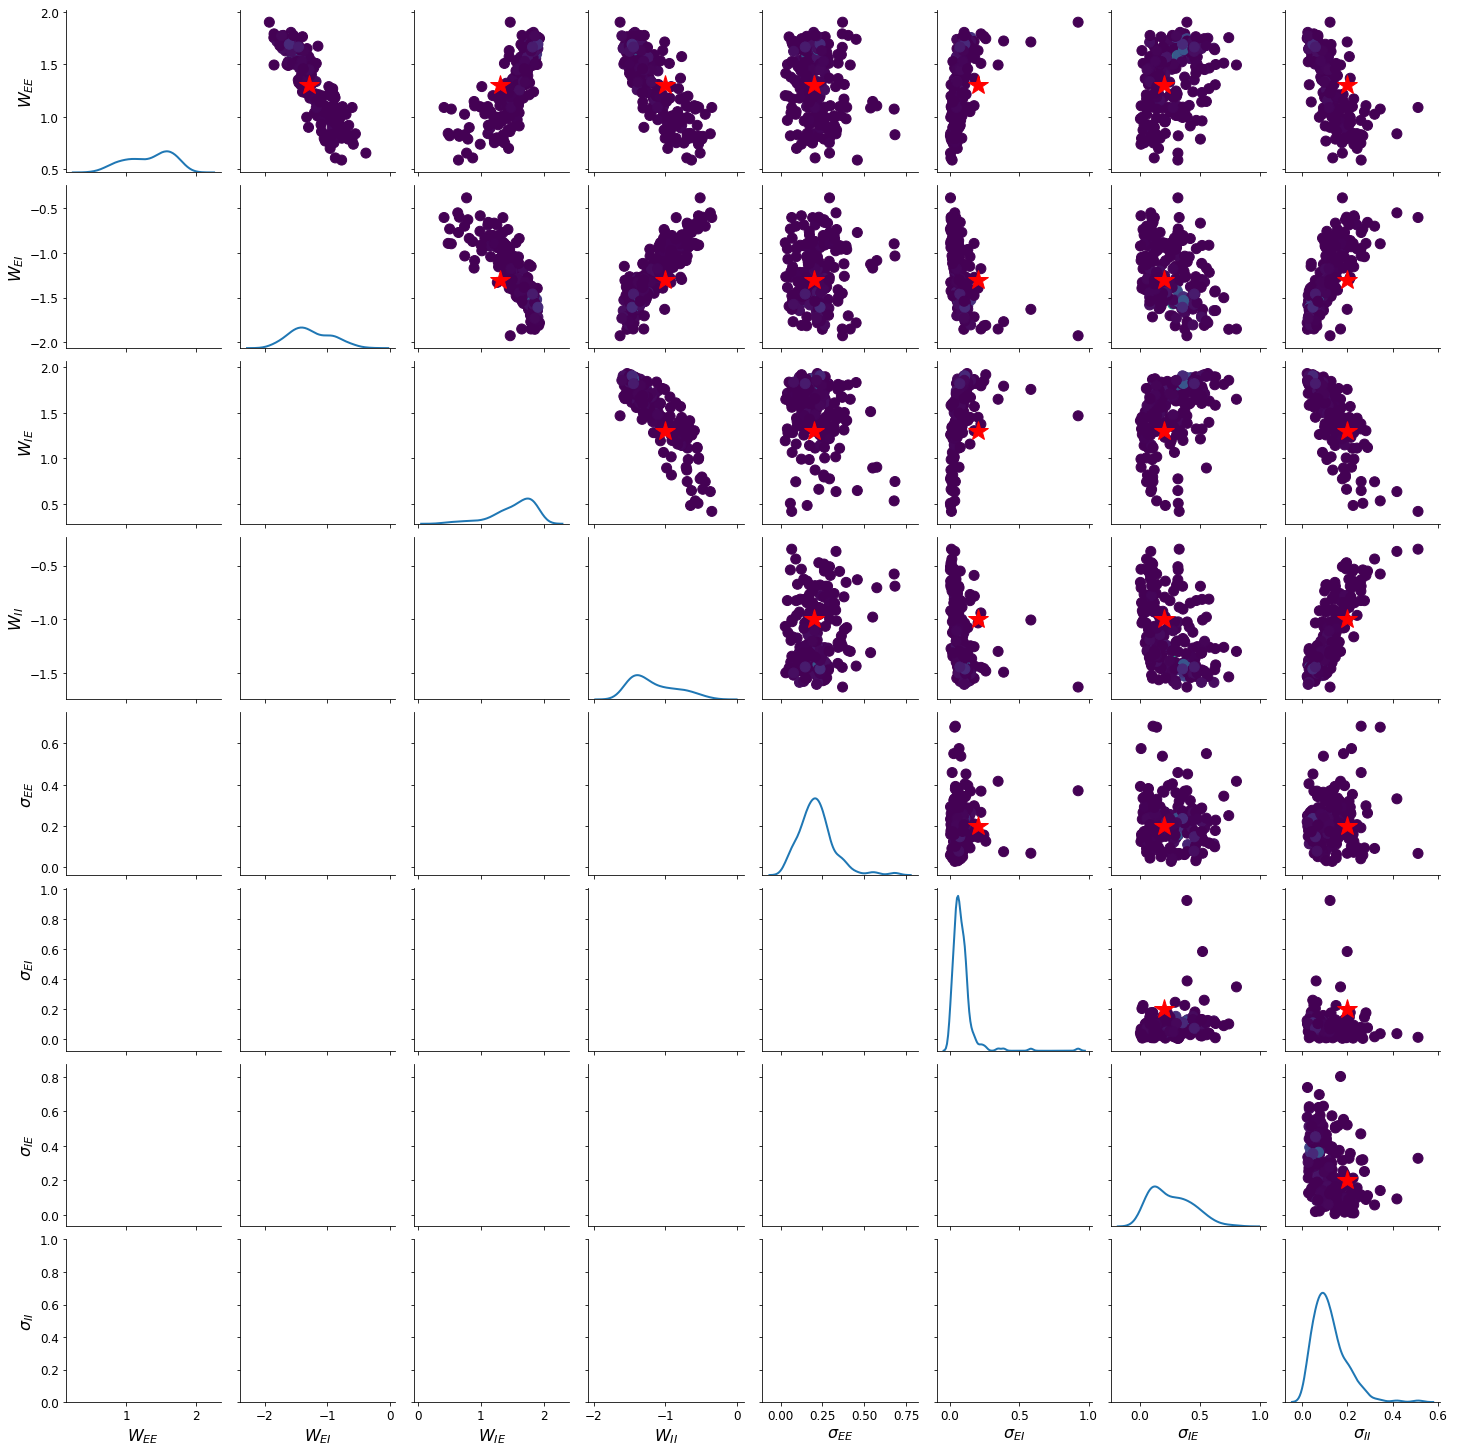

In [7]:
cnf, losses = train_SNPE(cnf, system, x0, M=M, R=R, num_iters=num_iters, z0=z0[0])

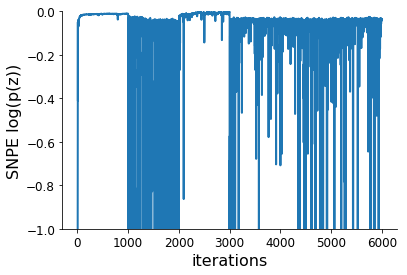

In [8]:
_losses = np.array(losses)
plt.figure()
plt.plot(-_losses)
plt.xlabel('iterations')
plt.ylabel('SNPE log(p(z))')
plt.ylim([-1, 0])
plt.show()

In [9]:
x0_torch = torch.tensor(x0).float()
z, log_prob= cnf(x0_torch, N=100)

<Figure size 432x288 with 0 Axes>

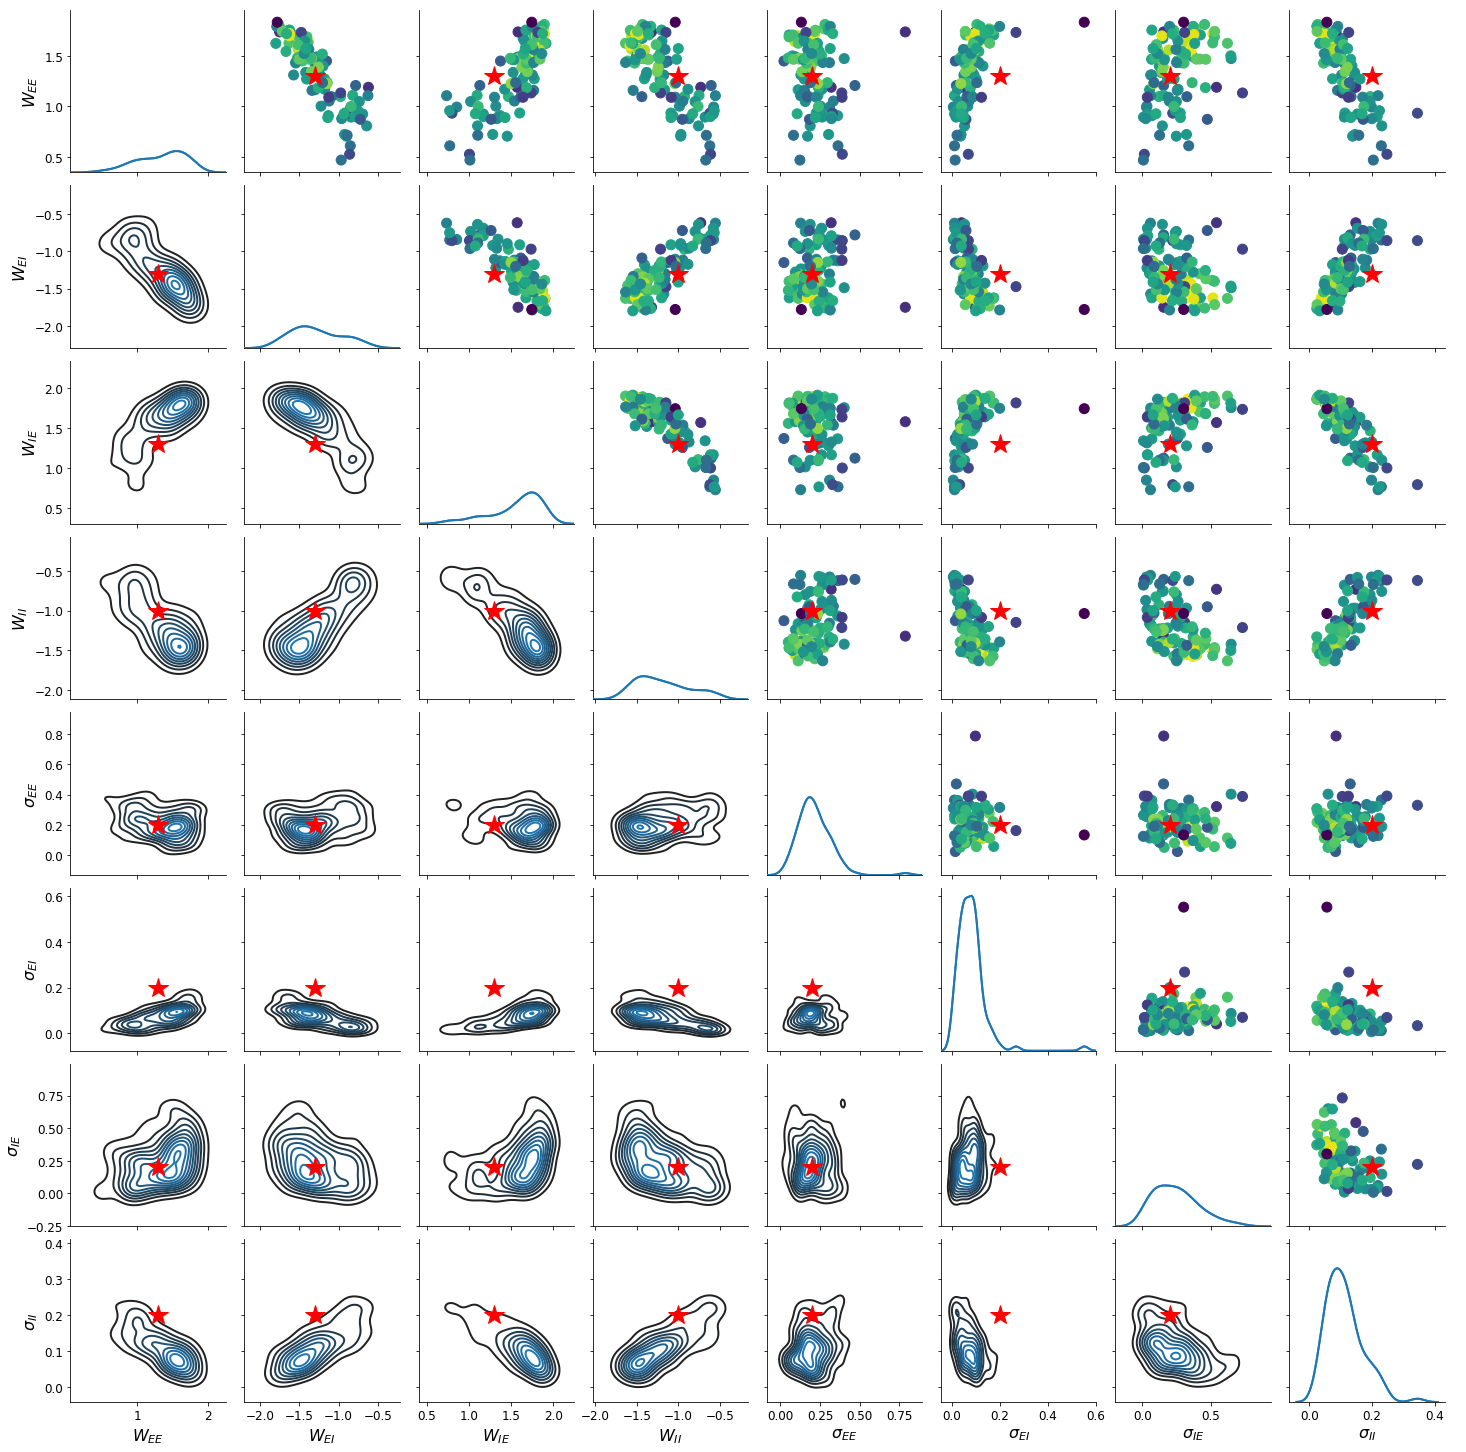

In [14]:
plt.figure()
g = plot_dist(
    z.detach().numpy()[0], 
    log_prob.detach().numpy()[0], 
    kde=True, z0=z0[0], 
    z_labels=system.z_labels
)
